In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
%matplotlib inline

In [2]:
data = pd.read_csv("neighbourhoods.csv")

In [3]:
data.head()

,neighbourhood_group,neighbourhood
0,Area Outside Territorial Authority,Area Outside Ward
1,Ashburton District,Ashburton Ward
2,Ashburton District,Eastern Ward
3,Ashburton District,Western Ward
4,Auckland,Albany Ward


In [4]:
df = pd.read_csv("listings.csv")

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20210210181232,2021-02-12,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,...,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20210210181232,2021-02-12,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,...,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06
2,5456,https://www.airbnb.com/rooms/5456,20210210181232,2021-02-12,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,10.0,10.0,9.0,NaN,f,1,1,0,0,3.74
3,5636,https://www.airbnb.com/rooms/5636,20210210181232,2021-02-12,"Soco, Barton Springs Private Guest Cottage",MONTHLY Short Term <br />Located in the awesom...,This area is one of the top areas in Austin to...,https://a0.muscache.com/pictures/17705/ef0b703...,7148,https://www.airbnb.com/users/show/7148,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.15
4,5769,https://www.airbnb.com/rooms/5769,20210210181232,2021-02-13,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,10.0,10.0,10.0,NaN,f,1,0,1,0,1.96


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10272 non-null  int64  
 1   listing_url                                   10272 non-null  object 
 2   scrape_id                                     10272 non-null  int64  
 3   last_scraped                                  10272 non-null  object 
 4   name                                          10272 non-null  object 
 5   description                                   10064 non-null  object 
 6   neighborhood_overview                         6545 non-null   object 
 7   picture_url                                   10270 non-null  object 
 8   host_id                                       10272 non-null  int64  
 9   host_url                                      10272 non-null 

In [22]:
df['host_total_listings_count'].max()

7235.0

In [48]:
top_host_ids = top_host['Host_ID'].to_list()
top_host_df = df[df.host_id.isin(top_host_ids)]
top_host_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1189,5316929,https://www.airbnb.com/rooms/5316929,20210210181232,2021-02-11,Deerfield: Personal Bedroom in Great Community,"Most people are young professionals, techies, ...",NaN,https://a0.muscache.com/pictures/109964932/acc...,8167447,https://www.airbnb.com/users/show/8167447,...,10.0,9.0,10.0,NaN,f,81,0,32,49,0.07
1260,5441730,https://www.airbnb.com/rooms/5441730,20210210181232,2021-02-11,Deerfield: Shared Room with Young Professionals,We work downtown Austin or nearby and like to ...,NaN,https://a0.muscache.com/pictures/109964973/b68...,8167447,https://www.airbnb.com/users/show/8167447,...,10.0,10.0,9.0,NaN,f,81,0,32,49,0.18
1269,5447230,https://www.airbnb.com/rooms/5447230,20210210181232,2021-02-11,Deerfield: Cool Spot in a Chill Place,You have your private room. We are 10min from ...,NaN,https://a0.muscache.com/pictures/103788924/a0e...,8167447,https://www.airbnb.com/users/show/8167447,...,10.0,10.0,9.0,NaN,f,81,0,32,49,0.12
1557,6955450,https://www.airbnb.com/rooms/6955450,20210210181232,2021-02-12,Guadalupe: Austin Young Professional Community,We are a community of 35-40 young adult guys/g...,Our property is in the North Loop neighborhood...,https://a0.muscache.com/pictures/88142680/f334...,8167447,https://www.airbnb.com/users/show/8167447,...,10.0,10.0,9.0,NaN,f,81,0,32,49,0.27
1570,7108253,https://www.airbnb.com/rooms/7108253,20210210181232,2021-02-12,Guadalupe: Austin Tech Community,We are a community of 35-40 young adult guys/g...,Our property is in the North Loop neighborhood...,https://a0.muscache.com/pictures/109966383/de0...,8167447,https://www.airbnb.com/users/show/8167447,...,10.0,10.0,9.0,NaN,f,81,0,32,49,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,48106605,https://www.airbnb.com/rooms/48106605,20210210181232,2021-02-12,Homey home | 3BR in Austin,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/716e1849-eafb...,359036978,https://www.airbnb.com/users/show/359036978,...,NaN,NaN,NaN,NaN,t,358,358,0,0,NaN
10267,48107269,https://www.airbnb.com/rooms/48107269,20210210181232,2021-02-12,Residences at the Domain,Stay for 31+ nights (minimum nights and rates ...,NaN,NaN,368944610,https://www.airbnb.com/users/show/368944610,...,NaN,NaN,NaN,NaN,t,40,40,0,0,NaN
10268,48107277,https://www.airbnb.com/rooms/48107277,20210210181232,2021-02-12,Residences at the Domain,Stay for 31+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/1e074e43-0ed1...,368944610,https://www.airbnb.com/users/show/368944610,...,NaN,NaN,NaN,NaN,t,40,40,0,0,NaN
10269,48109299,https://www.airbnb.com/rooms/48109299,20210210181232,2021-02-13,Relax in comfort | 1BR in Austin,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a826a2ec-e00b...,359036978,https://www.airbnb.com/users/show/359036978,...,NaN,NaN,NaN,NaN,t,358,358,0,0,NaN


# Top 10 areas with Highest Number of Listing

In [45]:
ds = df.nlargest(10, 'host_total_listings_count')

In [33]:
print(ds[['name']])

                                                    name
10022               Convenient Room Double Bed At Austin
6140   Club Wyndham Austin, Texas, 2 Bedroom Presiden...
6141                Relaxing Club Wyndham Austin, Studio
6180   Club Wyndham Austin, Texas, 1 Bedroom Deluxe S...
6181                  Club Wyndham Austin, Texas, Studio
6182   Cool Club Wyndham Austin, Studio, Discover Sto...
6221                  Club Wyndham Austin, Texas, Studio
6222                  Club Wyndham Austin, Texas, Studio
6343   Club Wyndham Austin, Texas, 1 Bedroom Deluxe S...
6591      Relaxing Club Wyndham Austin, 1 Bedroom Deluxe


# Top 10 hosts with Highest Number of Listing

In [46]:
top_host=df.host_id.value_counts().head(10)
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'Host_ID', 'host_id':'Count'}, inplace=True)
top_host

,Host_ID,Count
0,359036978,358
1,104309976,131
2,109638288,82
3,8167447,81
4,118565935,56
5,346827202,48
6,194953121,45
7,210733801,43
8,368944610,40
9,124060715,38


In [41]:
neighbourhood = 'neighbourhoods.geojson'

In [29]:
df['neighbourhood'].head()

0                             NaN
1                             NaN
2    Austin, Texas, United States
3    Austin, Texas, United States
4    Austin, Texas, United States
Name: neighbourhood, dtype: object

In [30]:
df['neighbourhood'].value_counts()

Austin, Texas, United States                    6458
Lakeway, Texas, United States                     32
West Lake Hills, Texas, United States             15
Sunset Valley, Texas, United States               11
Bee Cave, Texas, United States                     3
Dripping Springs, Texas, United States             3
Del Valle, Texas, United States                    2
United States                                      2
Pflugerville, Texas, United States                 2
Rollingwood, Texas, United States                  2
The Hills, Texas, United States                    2
Lake Travis, Texas, United States                  2
Austin , Texas, United States                      2
Austin, Tx, United States                          2
Bouldin, Austin, Texas, United States              1
Round Rock, Texas, United States                   1
austin, Texas, United States                       1
Westlake Hills, Austin, Texas, United States       1
Cypress Creek Arm, Texas, United States       

In [31]:
feq = df['neighbourhood'].value_counts().sort_values(ascending=True)

Text(0, 0.5, 'Cities')

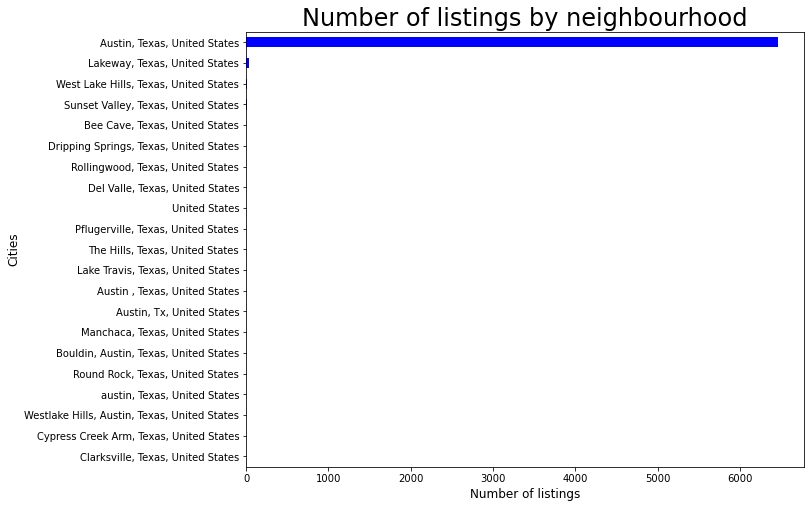

In [32]:
feq.plot.barh(figsize=(10,8),color='b')
plt.title("Number of listings by neighbourhood",fontsize = 24)
plt.xlabel('Number of listings' , fontsize=12)
plt.ylabel('Cities',fontsize=12)